<a href="https://colab.research.google.com/github/czhangg17/HIV-progression/blob/master/Covid_19_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción series temporales con datos del coronavirus

In [1]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import matplotlib.pylab as plt
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False



# Importacion de los datos

Pagina para acceso de los [datos](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr/data )
 en crudo



In [2]:
from google.colab import drive
PATH = '/content/drive/My Drive/Mineria de datos/datosCovid.csv' 
drive.mount('/content/drive')
covid=pd.read_csv(PATH, header=0)
#print(covid)  
#covid=pd.read_excel(datosCovid.xlsx.csv)
covid.tail()

#https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr/data

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais
57041,57082,2020-06-06T00:00:00.000,76001,Cali,Valle del Cauca,Casa,34,F,En estudio,Leve,NaN,2020-06-05T00:00:00.000,NaN,2020-06-17T00:00:00.000,NaN,2020-06-17T00:00:00.000,NaN,76,NaN
57042,57083,2020-06-10T00:00:00.000,76001,Cali,Valle del Cauca,Hospital,42,M,En estudio,Moderado,NaN,2020-05-31T00:00:00.000,NaN,2020-06-17T00:00:00.000,NaN,2020-06-17T00:00:00.000,NaN,76,NaN
57043,57084,2020-06-10T00:00:00.000,76001,Cali,Valle del Cauca,Casa,18,M,En estudio,Leve,NaN,2020-06-08T00:00:00.000,NaN,2020-06-17T00:00:00.000,NaN,2020-06-17T00:00:00.000,NaN,76,NaN
57044,57085,2020-06-06T00:00:00.000,8001,Barranquilla,Barranquilla D.E.,Hospital,5,M,En estudio,Moderado,NaN,2020-05-31T00:00:00.000,NaN,2020-06-17T00:00:00.000,NaN,2020-06-17T00:00:00.000,NaN,8,NaN
57045,57086,2020-06-09T00:00:00.000,8001,Barranquilla,Barranquilla D.E.,Casa,28,F,En estudio,Leve,NaN,2020-06-07T00:00:00.000,NaN,2020-06-16T00:00:00.000,NaN,2020-06-17T00:00:00.000,NaN,8,NaN


# Tratamiento 
Se agrupan los datos por fecha y se seleccionan las columnas de interés. Se obtiene la siguiente tabla .


In [3]:
covid_multi=pd.read_excel('/content/drive/My Drive/Mineria de datos/COV.xlsx')
covid_multi.tail()

,fecha,total_casos,total_muertes,total_recuperados
101,2020-06-14,49335,1606,NaN
102,2020-06-15,51459,1665,NaN
103,2020-06-16,53327,1740,NaN
104,2020-06-17,55442,1803,NaN
105,2020-06-18,58613,1889,22680.0


In [ ]:
#medidas descriptivas para datos en crudo
df=covid
df.describe()

In [5]:

df_diarios=pd.crosstab(df['Fecha de notificación'], columns='count')
df_acumulados=np.cumsum(df_diarios)

In [6]:
df_diarios.index=pd.to_datetime(df_diarios.index)
df_acumulados.index=pd.to_datetime(df_acumulados.index)
df_diarios.tail()

col_0,count
Fecha de notificación,
2020-06-12,1056
2020-06-13,686
2020-06-14,403
2020-06-15,157
2020-06-16,106


Text(0.5, 1.0, 'Grafica Casos diarios en Colombia')

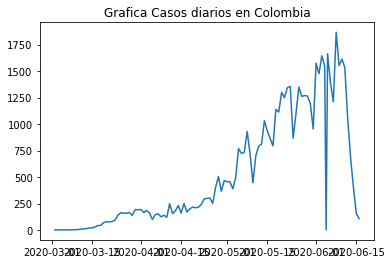

In [7]:
plt.plot(df_diarios)
plt.title('Grafica Casos diarios en Colombia')


Text(0.5, 1.0, 'Casos Acumulados en Colombia')

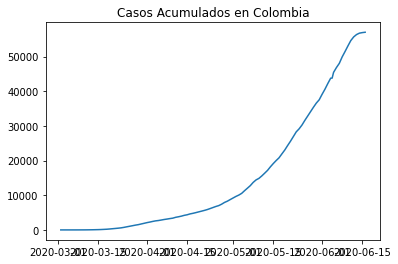

In [8]:
plt.plot(df_acumulados)
plt.title('Casos Acumulados en Colombia')

# Red LSTM con datos diarios


In [38]:
np.random.seed(7)

In [39]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [40]:
# esta funcion nos permite poner en una matriz los datos que se encuentrar en un vector
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)
# semilla aleatoria para reproducibilidad
np.random.seed(7)

## Reescalamiento de los datos


In [41]:
#normalizacion de los datos
diarios=df_diarios.values
dataset_scaled = scaler.fit_transform(diarios)
dataset=pd.DataFrame(dataset_scaled)
dataset.index=df_diarios.index

#diarios=scaler.fit_transform(diarios)


In [42]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset.iloc[0:train_size], dataset.iloc[train_size:len(df)]
len_train = len(train)
len_test = len(test)
print(len_train, len_test)


84 21


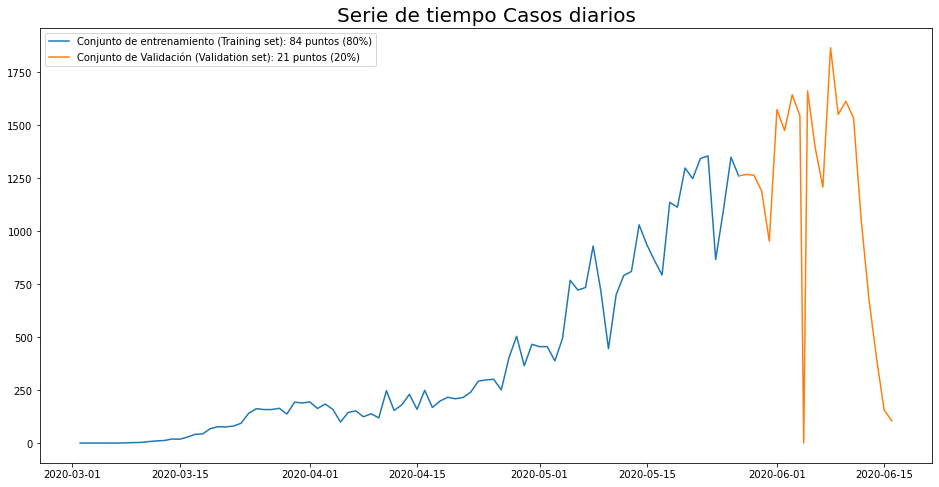

In [43]:
plt.figure(figsize=(16,8))
plt.plot(df_diarios[:len_train], label='Conjunto de entrenamiento (Training set): ' + str(len_train) +' puntos (80%)')
plt.plot(df_diarios['count'][len_train-1:], label='Conjunto de Validación (Validation set): '  + str(len_test) + ' puntos (20%)') 
plt.title("Serie de tiempo Casos diarios", size = 20)
plt.legend()
plt.show()

#prediccion del dato atpico
Exisite un dato atipico en alguna fecha, haremos la prediccion de este dato

(falta)

In [44]:
#preparando los datos
time_steps = 1

# reshape to [samples, time_steps, n_features]

X_train, trainY = create_dataset(train, train.values, time_steps)
X_test, testY = create_dataset(test, test.values, time_steps)


In [45]:
print(X_train.shape, trainY.shape)

(83, 1, 1) (83, 1)


In [54]:
lstm_output =60
model = keras.Sequential()
model.add(keras.layers.LSTM(units=lstm_output,  input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(units=1))

In [55]:
model.compile(loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.01)
)

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60)                14880     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 14,941
Trainable params: 14,941
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model.fit(
    X_train, trainY,
    epochs=30,
    batch_size=32,
    validation_split=0.01,
    verbose=1,
    shuffle=False
)

Epoch 1/30
3/3 [==============================] - 0s 118ms/step - loss: 0.0611 - val_loss: 0.2731
Epoch 2/30
3/3 [==============================] - 0s 12ms/step - loss: 0.0331 - val_loss: 0.1530
Epoch 3/30
3/3 [==============================] - 0s 11ms/step - loss: 0.0253 - val_loss: 0.0760
Epoch 4/30
3/3 [==============================] - 0s 11ms/step - loss: 0.0294 - val_loss: 0.0377
Epoch 5/30
3/3 [==============================] - 0s 11ms/step - loss: 0.0345 - val_loss: 0.0239
Epoch 6/30
3/3 [==============================] - 0s 11ms/step - loss: 0.0335 - val_loss: 0.0220
Epoch 7/30
3/3 [==============================] - 0s 11ms/step - loss: 0.0278 - val_loss: 0.0251
Epoch 8/30
3/3 [==============================] - 0s 11ms/step - loss: 0.0216 - val_loss: 0.0284
Epoch 9/30
3/3 [==============================] - 0s 10ms/step - loss: 0.0168 - val_loss: 0.0283
Epoch 10/30
3/3 [==============================] - 0s 11ms/step - loss: 0.0134 - val_loss: 0.0230
Epoch 11/30
3/3 [===========

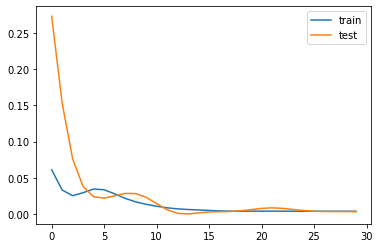

In [58]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [77]:
y_pred = model.predict(X_test)
x_pred=model.predict(X_train)

In [ ]:



# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
#trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
#testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

#lstm_output =60# como se escoge esta cantidad de outputs
#model = keras.Sequential()
#model.add(keras.layers.LSTM(units=lstm_output,  input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(keras.layers.Dense(units=1))

#compilacion del modelo
#model.compile(loss='mean_squared_error',
#  optimizer=keras.optimizers.Adam(0.01)
#)


(83, 1, 1) (83, 1)


In [59]:
def show_plot(plot_data, delta, title):
  labels = ['Historia', 'Futuro Verdadero' , 'Predicción del Modelo']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Salto de tiempo (Time-Step)')
  return plt

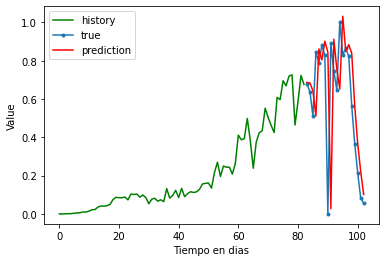

In [69]:
plt.plot(np.arange(0, len(trainY)), trainY, 'g', label="history")
plt.plot(np.arange(len(trainY), len(trainY) + len(testY)), testY, marker='.', label="true")
plt.plot(np.arange(len(trainY), len(trainY) + len(testY)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Tiempo en dias')
plt.legend()
plt.show();

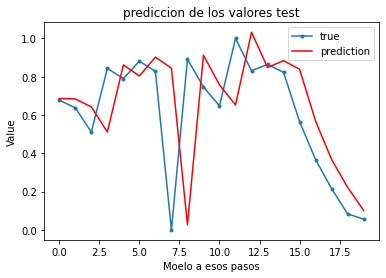

In [72]:
plt.plot(testY, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Moelo a esos pasos')
plt.legend()
plt.title('prediccion de los valores test')
plt.show();

#transformcion a la escala original

In [73]:
scaled_data = scaler.fit_transform(df_diarios.values)
dataset = pd.DataFrame(scaled_data)
dataset.columns = ['count']
dataset.index = df_diarios.index

In [74]:
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(testY.reshape(-1,1))
y_pred.shape

(20, 1)

In [78]:
x_pred=scaler.inverse_transform(x_pred)
x_test=scaler.inverse_transform(X_train.reshape(-1,1))
x_pred.shape

(83, 1)

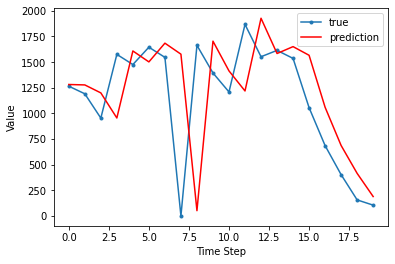

In [75]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [ ]:
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(trainPredict, testPredict))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, y_pred))
print('Resultado del test: %.2f RMSE' % (testScore))

In [81]:
# calculemos el error rms
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(x_test,x_pred))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, y_pred))
print('Resultado del test: %.2f RMSE' % (testScore))

Resultado del entrenamiento: 30.27 RMSE
Resultado del test: 0.31 RMSE


# Serie  con casos acumulados


In [ ]:
df=covid
df_diarios=pd.crosstab(df['Fecha de notificación'], columns='count')
df_acumulados=np.cumsum(df_diarios)
df_diarios.index=pd.to_datetime(df_diarios.index)
df_acumulados.index=pd.to_datetime(df_acumulados.index)
#df_acumulados.tail()


Text(0.5, 1.0, 'Casos acumulados en Colombia')

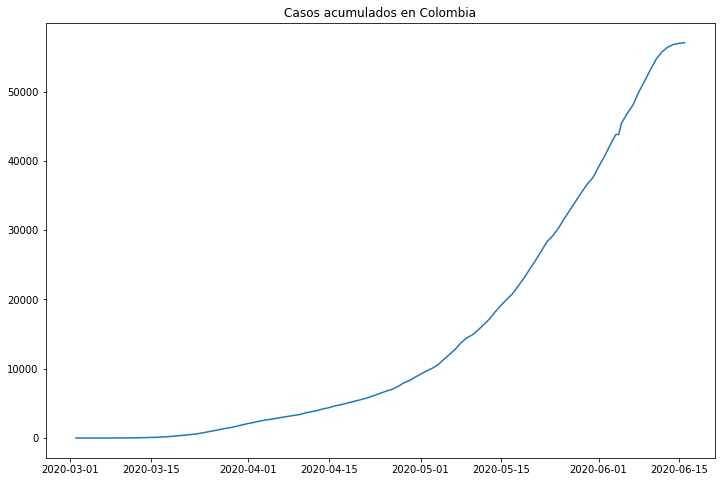

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df_acumulados)
plt.title('Casos acumulados en Colombia')

In [ ]:

#normalizacion de los datos
dataset_scaled = scaler.fit_transform(df_acumulados.values)
dataset=pd.DataFrame(dataset_scaled)
dataset.index=df_acumulados.index

#dividimo entre datos de entrenamiento y de validacion
train_size=int(len(dataset)*0.8)
test_size= len(dataset)-train_size
train=dataset[:train_size]
test=dataset[train_size:len(dataset)]
print(train_size,test_size)

# esta funcion nos permite poner en una matriz los datos que se encuentrar en un vector
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)
# semilla aleatoria para reproducibilidad
np.random.seed(7)



84 21


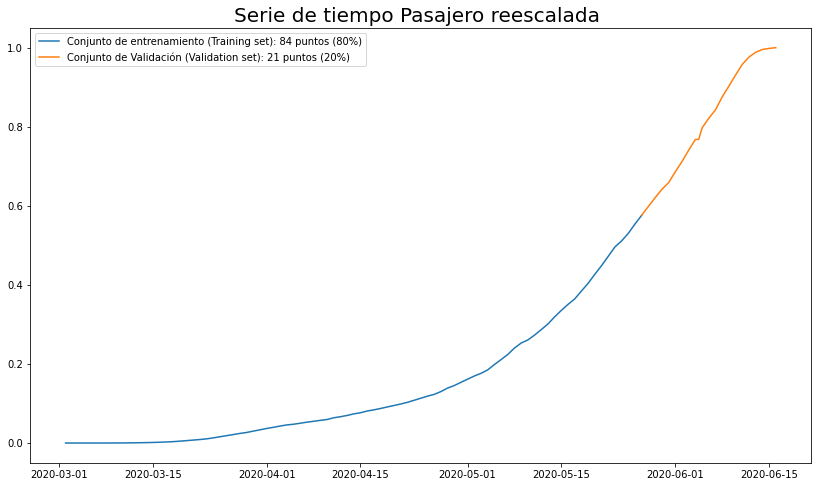

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(train, label='Conjunto de entrenamiento (Training set): ' + str(train_size) +' puntos (80%)')
plt.plot(dataset[train_size-1:len(df_acumulados)], label='Conjunto de Validación (Validation set): '  + str(test_size) + ' puntos (20%)') 
plt.title("Serie de tiempo Pasajero reescalada ", size = 20)
plt.legend()
plt.show()

In [ ]:
#preparando los datos
time_steps = 1

# reshape to [samples, time_steps, n_features]

X_train, trainY = create_dataset(train, train.values, time_steps)
X_test, testY = create_dataset(test, test.values, time_steps)

print(X_train.shape, trainY.shape)

(83, 1, 1) (83, 1)


In [ ]:
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
lstm_output =60# como se escoge esta cantidad de outputs
model = keras.Sequential()
model.add(keras.layers.LSTM(units=lstm_output,  input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(units=1))

In [ ]:

#compilacion del modelo
model.compile(loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.01)
)

In [ ]:
#history=model.fit(trainX,trainY,epochs=100, batch_size=1,verbose=2)
history = model.fit(
    trainX, trainY,
    epochs=50,
    batch_size=16,
    validation_split=0.01,
    verbose=1,
    shuffle=False
)

Epoch 1/50
6/6 [==============================] - 0s 65ms/step - loss: 0.0224 - val_loss: 0.1529
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0154 - val_loss: 0.0679
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0234 - val_loss: 0.0444
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0206 - val_loss: 0.0434
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0129 - val_loss: 0.0388
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0073 - val_loss: 0.0229
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0041 - val_loss: 0.0072
Epoch 8/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0024 - val_loss: 9.8819e-04
Epoch 9/50
6/6 [==============================] - 0s 7ms/step - loss: 8.1560e-04 - val_loss: 1.4730e-05
Epoch 10/50
6/6 [==============================] - 0s 7ms/step - loss: 7.9239e-05 - val_loss: 3.4012e-04
Epoch 11/50
6/6 [=

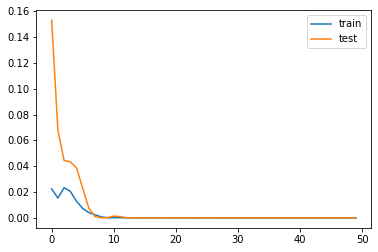

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [ ]:
#predicciones
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

#invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

#calculo del error rms
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Resultado del test: %.2f RMSE' % (testScore))

#predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPredict)+time_steps ] = trainPredict

# predicciones del test de cambio para plotear
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+1:len(dataset)-1, :] = testPredict

Resultado del entrenamiento: 216.12 RMSE
Resultado del test: 2547.47 RMSE


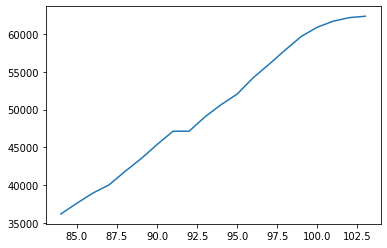

In [ ]:
plt.plot(testPredictPlot)


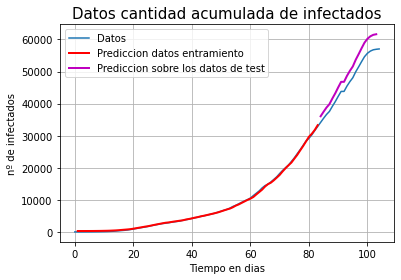

In [ ]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Datos cantidad acumulada de infectados", fontsize = 15)
plt.xlabel("Tiempo en dias", fontsize = 10)
plt.ylabel("nº de infectados", fontsize = 10)
plt.show()


# Serie numero de muertos acumulados


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
covid_multi=pd.read_excel('/content/drive/My Drive/Mineria de datos/COV.xlsx')
covid_multi.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fecha,total_casos,total_muertes,total_recuperados
101,2020-06-14,49335,1606,NaN
102,2020-06-15,51459,1665,NaN
103,2020-06-16,53327,1740,NaN
104,2020-06-17,55442,1803,NaN
105,2020-06-18,58613,1889,22680.0


Text(0.5, 1.0, 'Cantidad de muertos en colombia acumulados')

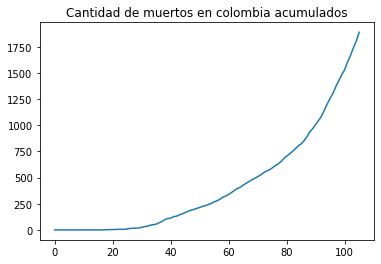

In [ ]:
df_muertos=covid_multi['total_muertes']
plt.plot(df_muertos)
plt.title('Cantidad de muertos en colombia acumulados')

In [ ]:
df_muertos_values=np.reshape(df_muertos.values, (-1,1))

In [ ]:
#normalizacion de los datos
dataset_scaled=scaler.fit_transform(df_muertos_values)
dataset=pd.DataFrame(dataset_scaled)
dataset.index.index=df_muertos.index

#division entre datos de validacion y datos de entrenamiento

train_size=int(len(dataset)*0.8)
test_size= len(dataset)-train_size
train=dataset[:train_size]
test=dataset[train_size:len(dataset)]
print(train_size,test_size)



84 22


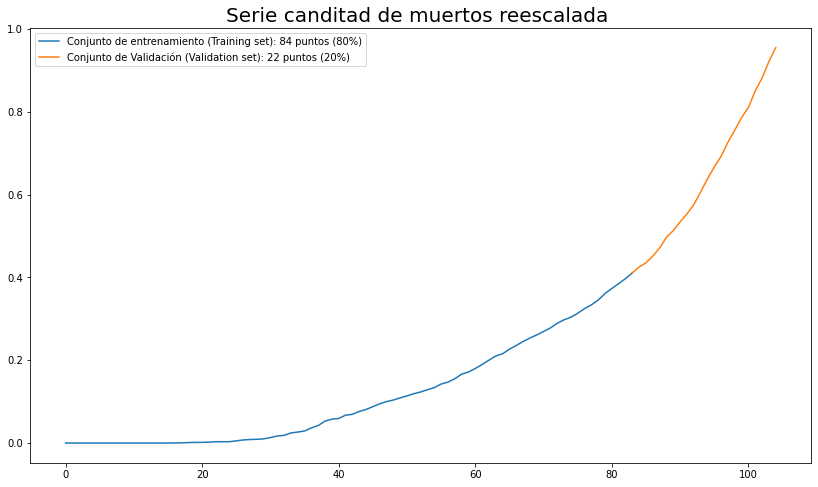

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(train, label='Conjunto de entrenamiento (Training set): ' + str(train_size) +' puntos (80%)')
plt.plot(dataset[train_size-1:len(df_acumulados)], label='Conjunto de Validación (Validation set): '  + str(test_size) + ' puntos (20%)') 
plt.title("Serie canditad de muertos reescalada ", size = 20)
plt.legend()
plt.show()

In [ ]:
#preparando los datos
time_steps = 1

# reshape to [samples, time_steps, n_features]

X_train, trainY = create_dataset(train, train.values, time_steps)
X_test, testY = create_dataset(test, test.values, time_steps)

print(X_train.shape, trainY.shape)

# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

lstm_output =60 # como se escoge esta cantidad de outputs
model = keras.Sequential()
model.add(keras.layers.LSTM(units=lstm_output,  input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(units=1))

#compilacion del modelo
model.compile(loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.01)
)

(83, 1, 1) (83, 1)


In [ ]:
history = model.fit(
    trainX, trainY,
    epochs=50,
    batch_size=16,
    validation_split=0.01,
    verbose=1,
    shuffle=False
)

Epoch 1/50
6/6 [==============================] - 0s 64ms/step - loss: 0.0130 - val_loss: 0.0562
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0123 - val_loss: 0.0240
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0159 - val_loss: 0.0231
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0109 - val_loss: 0.0255
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0065 - val_loss: 0.0190
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0085
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 8/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0016 - val_loss: 8.4295e-04
Epoch 9/50
6/6 [==============================] - 0s 8ms/step - loss: 3.7476e-04 - val_loss: 1.0825e-04
Epoch 10/50
6/6 [==============================] - 0s 7ms/step - loss: 3.1301e-05 - val_loss: 2.1092e-04
Epoch 11/50
6/6 [=

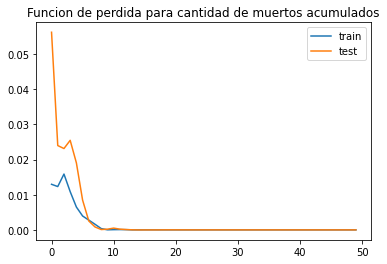

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Funcion de perdida para cantidad de muertos acumulados')
plt.legend();

In [ ]:
#predicciones
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

#invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

#calculo del error rms
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Resultado del test: %.2f RMSE' % (testScore))


Resultado del entrenamiento: 5.99 RMSE
Resultado del test: 37.83 RMSE


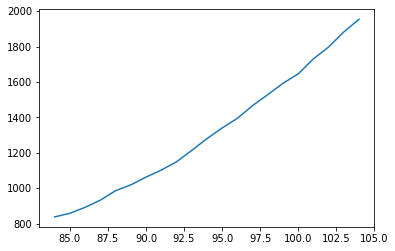

In [ ]:
#predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPredict)+time_steps ] = trainPredict

# predicciones del test de cambio para plotear
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+1:len(dataset)-1, :] = testPredict

plt.plot(testPredictPlot)

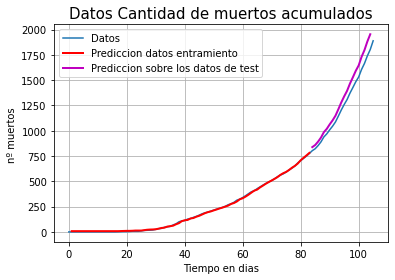

In [ ]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Datos Cantidad de muertos acumulados", fontsize = 15)
plt.xlabel("Tiempo en dias", fontsize = 10)
plt.ylabel("nº muertos ", fontsize = 10)
plt.show()


# Serie numero de recuperados

Text(0.5, 1.0, 'Serie de numero de recuperados acumulados')

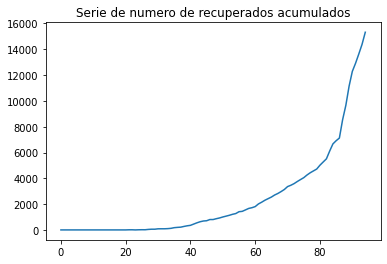

In [ ]:
df_recuperados=covid_multi['total_recuperados'][:95]
plt.plot(df_recuperados)
plt.title('Serie de numero de recuperados acumulados')

In [ ]:
#normalizacion de los datos
df_recuperados_value=np.reshape(df_recuperados.values,(-1,1))
dataset_scaled = scaler.fit_transform(df_recuperados_value)
dataset=pd.DataFrame(dataset_scaled)
dataset.index=df_recuperados.index

In [ ]:
#dividimo entre datos de entrenamiento y de validacion
train_size=int(len(dataset)*0.8)
test_size= len(dataset)-train_size
train=dataset[:train_size]
test=dataset[train_size:len(dataset)]
print(train_size,test_size)



76 19


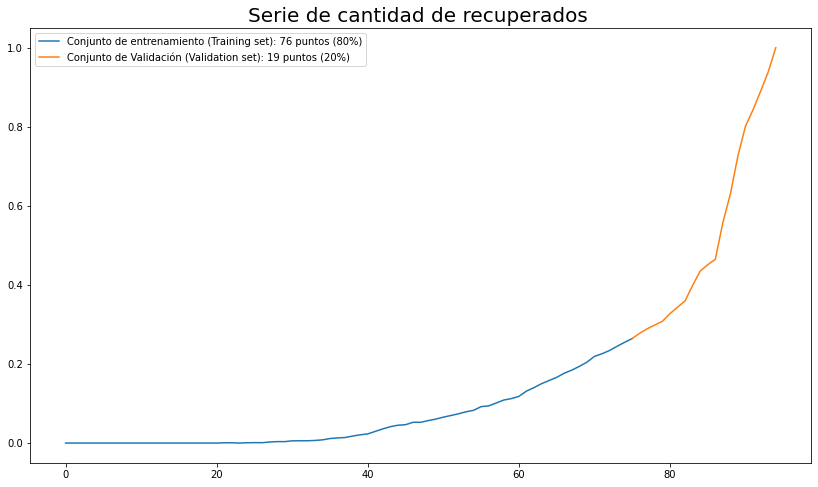

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(train, label='Conjunto de entrenamiento (Training set): ' + str(train_size) +' puntos (80%)')
plt.plot(dataset[train_size-1:len(df_acumulados)], label='Conjunto de Validación (Validation set): '  + str(test_size) + ' puntos (20%)') 
plt.title("Serie de cantidad de recuperados ", size = 20)
plt.legend()
plt.show()

In [ ]:
#preparando los datos
time_steps = 1

# reshape to [samples, time_steps, n_features]

X_train, trainY = create_dataset(train, train.values, time_steps)
X_test, testY = create_dataset(test, test.values, time_steps)

print(X_train.shape, trainY.shape)

# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

lstm_output =60# como se escoge esta cantidad de outputs
model = keras.Sequential()
model.add(keras.layers.LSTM(units=lstm_output,  input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(units=1))

#compilacion del modelo
model.compile(loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.01)
)


(75, 1, 1) (75, 1)


In [ ]:
history = model.fit(
    trainX, trainY,
    epochs=50,
    batch_size=16,
    validation_split=0.01,
    verbose=1,
    shuffle=False
)

Epoch 1/50
5/5 [==============================] - 0s 83ms/step - loss: 0.0027 - val_loss: 0.0191
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0076 - val_loss: 0.0217
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0050 - val_loss: 0.0261
Epoch 4/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0033 - val_loss: 0.0213
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 0.0023 - val_loss: 0.0129
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0020 - val_loss: 0.0075
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0018 - val_loss: 0.0056
Epoch 8/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 9/50
5/5 [==============================] - 0s 9ms/step - loss: 4.8433e-04 - val_loss: 0.0015
Epoch 10/50
5/5 [==============================] - 0s 9ms/step - loss: 1.7232e-04 - val_loss: 1.2729e-04
Epoch 11/50
5/5 [=======

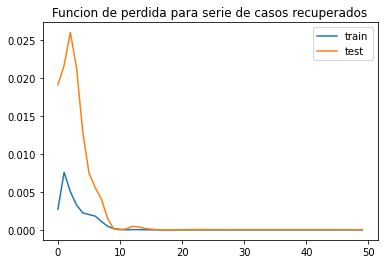

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Funcion de perdida para serie de casos recuperados')
plt.legend();

In [ ]:
#predicciones
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

#invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

#calculo del error rms
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Resultado del test: %.2f RMSE' % (testScore))

#predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPredict)+time_steps ] = trainPredict

# predicciones del test de cambio para plotear
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+1:len(dataset)-1, :] = testPredict

Resultado del entrenamiento: 37.69 RMSE
Resultado del test: 535.53 RMSE


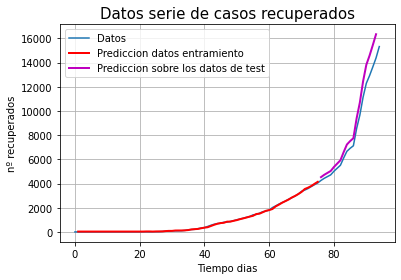

In [ ]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Datos serie de casos recuperados", fontsize = 15)
plt.xlabel("Tiempo dias", fontsize = 10)
plt.ylabel("nº recuperados", fontsize = 10)
plt.show()


# Red LSTM  Multivariada



In [ ]:
# Importamcion de datos para la parte multivariada
from google.colab import drive
drive.mount('/content/drive')
covid_multi=pd.read_excel('/content/drive/My Drive/Mineria de datos/COV.xlsx')
covid_multi.tail()
#llenar los na con 16000 y 16.500 los datos 95 y 96 en total recuperados


In [ ]:

features_considered = ['total_casos','total_muertes','total_recuperados']

In [ ]:
features = covid_multi[features_considered]
features.index = covid_multi['fecha']
features.head()

In [ ]:
features.plot(subplots=True)


In [ ]:
dataset = features.values

len_train=int(len(dataset)* 0.8)
len_test=int(len(dataset)*0.2)
data_mean = dataset[:len_train].mean(axis=0)
data_std = dataset[:len_train].std(axis=0)

In [ ]:
print(len_train,len_test)

#Reescalamiento de los datos

In [ ]:
#dataset = (dataset-data_mean)/data_std
TRAIN_SPLIT=int(len(dataset)*0.8)
VAL_SPLIT =int(len(dataset) *0.2)
print(TRAIN_SPLIT,VAL_SPLIT)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

## modelo a un paso

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [ ]:
past_history = 15
future_target = 0
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [ ]:
x_train_single.shape 
x_val_single.shape
y_val_single.shape

In [ ]:
BATCH_SIZE=6 # 6 Lotes de 3 filas o registros 
BUFFER_SIZE=100

In [ ]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

train_data_single
val_data_single

In [ ]:
print(val_data_single)

In [ ]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(54,input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

In [ ]:
#otra forma de crear el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=STEP, return_sequences=True, input_shape=(x_train_single.shape[1],1)),
    tf.keras.layers.LSTM(units=STEP),
    tf.keras.layers.Dense(1)])

In [ ]:
#compilacion del otro modelo
model.compile(loss='mse', optimizer=keras.optimizers.Adam(0.01))

In [ ]:
x_train_single.shape[-2:]

# compilacion del modelo

In [ ]:
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mse')

In [ ]:
EPOCHS=30
EVALUATION_INTERVAL=1
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=1)

In [ ]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

In [ ]:
plot_train_history(single_step_history,
                   'Entrnamiento del Modelo de un paso y función de pérdida')

In [ ]:
single_step_model.summary()

In [ ]:
#inputs = dataset[len_data - len_valid - time_step:].values
#inputs = inputs.reshape(-1,1)
#inputs  = scaler.transform(inputs)

#x_test = []
#for i in range(time_step,inputs.shape[0]):
#    x_test.append(inputs[i-time_step:i,0])
#x_test = np.array(x_test)
#x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

#prediccion a un paso

In [ ]:
for x, y in val_data_single.take(3):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Predicciones de un paso')
  plot.show()

# siguiendo otro script
https://www.curiousily.com/posts/time-series-forecasting-with-lstm-for-daily-coronavirus-cases/